In [ ]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline

# The Data
Let's start by reading in the incident_event_log.csv file into a pandas dataframe.

In [ ]:
data = pd.read_csv("incident_event_log.csv")

In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [ ]:
data.columns=['number', 'incidentstate', 'active', 'reassignmentcount',
       'reopencount', 'sysmodcount', 'madesla', 'callerid', 'openedby',
       'openedat', 'syscreatedby', 'syscreatedat', 'sysupdatedby',
       'sysupdatedat', 'contact_type', 'location', 'category', 'subcategory',
       'usymptom', 'cmdbci', 'impact', 'urgency', 'priority',
       'assignmentgroup', 'assignedto', 'knowledge',
       'upriorityconfirmation', 'notify', 'problemid', 'rfc', 'vendor',
       'causedby', 'closedcode', 'resolvedby', 'resolvedat', 'closedat']

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
data1=data.drop(['madesla','category','cmdbci','urgency','priority','assignmentgroup','resolvedby','vendor','resolvedat','closedat','closedcode'],axis=1)

In [ ]:
data1.head(5)

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,callerid,openedby,openedat,syscreatedby,syscreatedat,sysupdatedby,sysupdatedat,contact_type,location,subcategory,usymptom,impact,assignedto,knowledge,upriorityconfirmation,notify,problemid,rfc,causedby
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Subcategory 170,Symptom 72,2 - Medium,?,True,False,Do Not Notify,?,?,?
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Subcategory 170,Symptom 72,2 - Medium,?,True,False,Do Not Notify,?,?,?
2,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Subcategory 170,Symptom 72,2 - Medium,?,True,False,Do Not Notify,?,?,?
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Subcategory 170,Symptom 72,2 - Medium,?,True,False,Do Not Notify,?,?,?
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Subcategory 215,Symptom 471,2 - Medium,Resolver 89,True,False,Do Not Notify,?,?,?


In [ ]:
data1.shape

(141712, 25)

# replacing '?' with nan 

In [ ]:
data1.replace('?', np.nan,inplace=True)

In [ ]:
data1.columns

Index(['number', 'incidentstate', 'active', 'reassignmentcount', 'reopencount',
       'sysmodcount', 'callerid', 'openedby', 'openedat', 'syscreatedby',
       'syscreatedat', 'sysupdatedby', 'sysupdatedat', 'contact_type',
       'location', 'subcategory', 'usymptom', 'impact', 'assignedto',
       'knowledge', 'upriorityconfirmation', 'notify', 'problemid', 'rfc',
       'causedby'],
      dtype='object')

# finding unique values 

In [ ]:
variable=['number', 'incidentstate', 'active', 'reassignmentcount', 'reopencount',
       'sysmodcount', 'callerid', 'openedby', 'openedat', 'syscreatedby',
       'syscreatedat', 'sysupdatedby', 'sysupdatedat', 'contact_type',
       'location', 'subcategory', 'usymptom', 'impact', 'assignedto',
       'knowledge', 'upriorityconfirmation', 'notify', 'problemid', 'rfc',
       'causedby']

for variable in data1:
    print ('\nFrequency of Categories for varible %s'%variable)
    print (data1[variable].value_counts())
    


Frequency of Categories for varible number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0014151     2
INC0017238     2
INC0025153     2
INC0030994     2
INC0011299     2
Name: number, Length: 24918, dtype: int64

Frequency of Categories for varible incidentstate
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incidentstate, dtype: int64

Frequency of Categories for varible active
True     116726
False     24986
Name: active, dtype: int64

Frequency of Categories for varible reassignmentcount
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18  

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!


In [1]:
data1.isnull().sum()

NameError: ignored

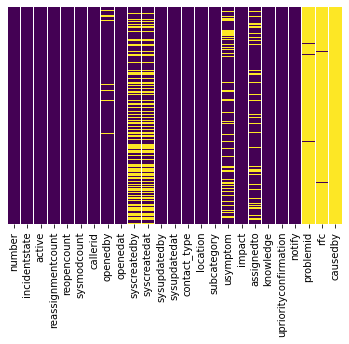

In [ ]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 
Roughly 40 percent of the created by and created at data is missing. The proportion of created by and created at missing is likely small enough for reasonable replacement with some form of imputation.looking at column usersymptom AND assignedto less amount of data is missing nearly around 10% od data.Looking at the problem id , rfc and causedby  it looks like we are just missing too much of that data nearly 99% of data to do something useful with at a basic level. We'll probably drop this later.

Let's continue on by visualizing some more of the data! 

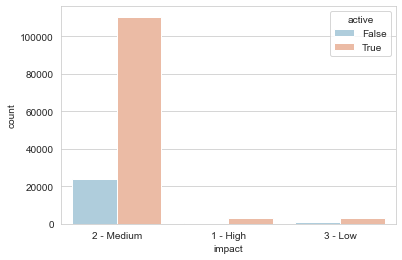

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='impact',hue='active',data=data1,palette='RdBu_r')

# speed up EDA process using pandas profilling 

In [ ]:
import pandas_profiling as pp 


In [ ]:
EDA_report= pp.ProfileReport(data1)
EDA_report.to_file(output_file='report.html')

In [ ]:
for i, col in enumerate(data1.columns):
    print('\n',i,'.',col)
    print(data1[col].value_counts())
    print('*'*60,'\n')
     


 0 . number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0014151     2
INC0017238     2
INC0025153     2
INC0030994     2
INC0011299     2
Name: number, Length: 24918, dtype: int64
************************************************************ 


 1 . incidentstate
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incidentstate, dtype: int64
************************************************************ 


 2 . active
True     116726
False     24986
Name: active, dtype: int64
************************************************************ 


 3 . reassignmentcount
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61

As We can Observe From above Visualisation and value counts data, Features 'problemid', 'causedby' and rfc' are having very high no. of Missing values so we will exclude these features from further analysis. These features add no value to our data analysis.

# data cleaning 


In [ ]:
data2=data1.drop(['problemid','causedby','rfc'],axis=1)

In [ ]:
data2.shape

(141712, 22)

In [ ]:
data2.isnull().sum()

number                       0
incidentstate                0
active                       0
reassignmentcount            0
reopencount                  0
sysmodcount                  0
callerid                    29
openedby                  4835
openedat                     0
syscreatedby             53076
syscreatedat             53076
sysupdatedby                 0
sysupdatedat                 0
contact_type                 0
location                    76
subcategory                111
usymptom                 32964
impact                       0
assignedto               27496
knowledge                    0
upriorityconfirmation        0
notify                       0
dtype: int64

In [ ]:
for col in ['syscreatedby','usymptom']:
    data2[col].fillna(data2[col].mode()[0],inplace=True)

In [ ]:
data2["callerid"].fillna( method ='ffill', inplace = True) 
data2["openedby"].fillna( method ='ffill', inplace = True) 
data2["location"].fillna( method ='ffill', inplace = True) 
data2["subcategory"].fillna( method ='ffill', inplace = True) 
data2["assignedto"].fillna( method ='ffill', inplace = True) 
data2["syscreatedat"].fillna( method ='ffill', inplace = True) 


In [ ]:
data2.isnull().sum()

number                   0
incidentstate            0
active                   0
reassignmentcount        0
reopencount              0
sysmodcount              0
callerid                 0
openedby                 0
openedat                 0
syscreatedby             0
syscreatedat             0
sysupdatedby             0
sysupdatedat             0
contact_type             0
location                 0
subcategory              0
usymptom                 0
impact                   0
assignedto               4
knowledge                0
upriorityconfirmation    0
notify                   0
dtype: int64

In [ ]:
data2=data2.dropna()

In [ ]:
data2.isnull().sum()

number                   0
incidentstate            0
active                   0
reassignmentcount        0
reopencount              0
sysmodcount              0
callerid                 0
openedby                 0
openedat                 0
syscreatedby             0
syscreatedat             0
sysupdatedby             0
sysupdatedat             0
contact_type             0
location                 0
subcategory              0
usymptom                 0
impact                   0
assignedto               0
knowledge                0
upriorityconfirmation    0
notify                   0
dtype: int64

In [ ]:
data2.columns

Index(['number', 'incidentstate', 'active', 'reassignmentcount', 'reopencount',
       'sysmodcount', 'callerid', 'openedby', 'openedat', 'syscreatedby',
       'syscreatedat', 'sysupdatedby', 'sysupdatedat', 'contact_type',
       'location', 'subcategory', 'usymptom', 'impact', 'assignedto',
       'knowledge', 'upriorityconfirmation', 'notify'],
      dtype='object')

In [ ]:
data2["caller_id"]=data2["callerid"].apply(lambda x: int(x.split(' ')[-1]))
data2["open_by"]=data2["openedby"].apply(lambda x: int(x.split(' ')[3]))
data2["createdby"]=data2["syscreatedby"].apply(lambda x: int(x.split(' ')[-1]))
data2["updatedby"]=data2["sysupdatedby"].apply(lambda x: int(x.split(' ')[-1]))
data2["loc"]=data2["location"].apply(lambda x: int(x.split(' ')[-1]))
data2["category"]=data2["subcategory"].apply(lambda x: int(x.split(' ')[-1]))
data2["symptom"]=data2["usymptom"].apply(lambda x: int(x.split(' ')[-1]))
data2["i_impact"]=data2["impact"].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
data2["assigned_to"]=data2["assignedto"].apply(lambda x: int(x.split(' ')[-1]))

In [ ]:
data2.head(5)

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,callerid,openedby,openedat,syscreatedby,syscreatedat,sysupdatedby,sysupdatedat,contact_type,location,subcategory,usymptom,impact,assignedto,knowledge,upriorityconfirmation,notify,caller_id,open_by,createdby,updatedby,loc,category,symptom,i_impact,assigned_to
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Subcategory 215,Symptom 471,2 - Medium,Resolver 89,True,False,Do Not Notify,2403,397,171,746,165,215,471,2,89
5,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:30,Phone,Location 165,Subcategory 215,Symptom 471,2 - Medium,Resolver 31,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31
6,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:33,Phone,Location 165,Subcategory 215,Symptom 471,2 - Medium,Resolver 31,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31
7,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 804,29/2/2016 11:31,Phone,Location 165,Subcategory 215,Symptom 471,2 - Medium,Resolver 31,True,False,Do Not Notify,2403,397,171,804,165,215,471,2,31
8,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 703,29/2/2016 11:32,Phone,Location 165,Subcategory 215,Symptom 471,2 - Medium,Resolver 31,True,False,Do Not Notify,2403,397,171,703,165,215,471,2,31


In [ ]:
data2=data2.drop(['callerid','openedby','syscreatedby','sysupdatedby','location','subcategory','usymptom','impact','assignedto'],axis=1)

In [ ]:
data2.shape

(141708, 22)

In [ ]:
data2=data2.drop(['notify'],axis=1)

In [ ]:
data2.head(5)

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,openedat,syscreatedat,sysupdatedat,contact_type,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,category,symptom,i_impact,assigned_to
4,INC0000047,New,True,0,0,0,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 04:57,Phone,True,False,2403,397,171,746,165,215,471,2,89
5,INC0000047,Active,True,1,0,1,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:30,Phone,True,False,2403,397,171,21,165,215,471,2,31
6,INC0000047,Active,True,1,0,2,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:33,Phone,True,False,2403,397,171,21,165,215,471,2,31
7,INC0000047,Active,True,1,0,3,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:31,Phone,True,False,2403,397,171,804,165,215,471,2,31
8,INC0000047,Active,True,1,0,4,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:32,Phone,True,False,2403,397,171,703,165,215,471,2,31


In [ ]:
data2.shape

(141708, 21)

In [ ]:
updated= pd.Series(data2.sysupdatedat)
opened= pd.Series(data2.openedat)
created= pd.Series(data2.syscreatedat)

sysupdate_dat= pd.to_datetime(updated)
opened_at= pd.to_datetime(opened)
syscreated_at= pd.to_datetime(created)

In [ ]:
data2.drop(['sysupdatedat','openedat','syscreatedat'],axis=1,inplace=True)

In [ ]:
data2.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contact_type,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,category,symptom,i_impact,assigned_to
4,INC0000047,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89
5,INC0000047,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31
6,INC0000047,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31
7,INC0000047,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31
8,INC0000047,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31


In [ ]:
data2.shape

(141708, 18)

In [ ]:
df=pd.concat([data2,sysupdate_dat,opened_at,syscreated_at],axis=1)


In [ ]:
df.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contact_type,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,category,symptom,i_impact,assigned_to,sysupdatedat,openedat,syscreatedat
4,INC0000047,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89,2016-02-29 04:57:00,2016-02-29 04:40:00,2016-02-29 04:57:00
5,INC0000047,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31,2016-02-29 05:30:00,2016-02-29 04:40:00,2016-02-29 04:57:00
6,INC0000047,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31,2016-02-29 05:33:00,2016-02-29 04:40:00,2016-02-29 04:57:00
7,INC0000047,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31,2016-02-29 11:31:00,2016-02-29 04:40:00,2016-02-29 04:57:00
8,INC0000047,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31,2016-02-29 11:32:00,2016-02-29 04:40:00,2016-02-29 04:57:00


In [ ]:
df.shape

(141708, 21)

#  different column has been created for day,date & year inorder to perform feature selection


In [ ]:


df["updated_day"]=pd.to_datetime(df.sysupdatedat).dt.day
df["updated_month"]=pd.to_datetime(df.sysupdatedat).dt.month
df["updated_year"]=pd.to_datetime(df.sysupdatedat).dt.year
df["updated_hr"]=pd.to_datetime(df.sysupdatedat).dt.hour
df["updated_minute"]=pd.to_datetime(df.sysupdatedat).dt.minute



df["opened_at_day"]=pd.to_datetime(df.openedat).dt.day
df["opened_at_month"]=pd.to_datetime(df.openedat).dt.month
df["opened_at_year"]=pd.to_datetime(df.openedat).dt.year
df["opened_at_hr"]=pd.to_datetime(df.openedat).dt.hour
df["opened_at_minute"]=pd.to_datetime(df.openedat).dt.minute



df["created_at_day"]=pd.to_datetime(df.syscreatedat).dt.day
df["created_at_month"]=pd.to_datetime(df.syscreatedat).dt.month
df["created_at_year"]=pd.to_datetime(df.syscreatedat).dt.year
df["created_at_hr"]=pd.to_datetime(df.syscreatedat).dt.hour
df["created_at_minute"]=pd.to_datetime(df.syscreatedat).dt.minute



In [ ]:
df.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contact_type,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,category,symptom,i_impact,assigned_to,sysupdatedat,openedat,syscreatedat,updated_day,updated_month,updated_year,updated_hr,updated_minute,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
4,INC0000047,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89,2016-02-29 04:57:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,4,57,29,2,2016,4,40,29,2,2016,4,57
5,INC0000047,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31,2016-02-29 05:30:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,5,30,29,2,2016,4,40,29,2,2016,4,57
6,INC0000047,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31,2016-02-29 05:33:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,5,33,29,2,2016,4,40,29,2,2016,4,57
7,INC0000047,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31,2016-02-29 11:31:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,11,31,29,2,2016,4,40,29,2,2016,4,57
8,INC0000047,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31,2016-02-29 11:32:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,11,32,29,2,2016,4,40,29,2,2016,4,57


In [ ]:
df.drop(['sysupdatedat','syscreatedat','openedat'],axis=1,inplace=True)


In [ ]:
df.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contact_type,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,category,symptom,i_impact,assigned_to,updated_day,updated_month,updated_year,updated_hr,updated_minute,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
4,INC0000047,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89,29,2,2016,4,57,29,2,2016,4,40,29,2,2016,4,57
5,INC0000047,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31,29,2,2016,5,30,29,2,2016,4,40,29,2,2016,4,57
6,INC0000047,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31,29,2,2016,5,33,29,2,2016,4,40,29,2,2016,4,57
7,INC0000047,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31,29,2,2016,11,31,29,2,2016,4,40,29,2,2016,4,57
8,INC0000047,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31,29,2,2016,11,32,29,2,2016,4,40,29,2,2016,4,57


# encoding of the data

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
x =LabelEncoder()

df['number']=x.fit_transform(df['number'])

df['active']=x.fit_transform(df['active'])

df['incidentstate']=x.fit_transform(df['incidentstate'])

df['contact_type']=x.fit_transform(df['contact_type'])

df['knowledge']=x.fit_transform(df['knowledge'])

df['upriorityconfirmation']=x.fit_transform(df['upriorityconfirmation'])



In [ ]:
df.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contact_type,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,category,symptom,i_impact,assigned_to,updated_day,updated_month,updated_year,updated_hr,updated_minute,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
4,0,7,1,0,0,0,3,1,0,2403,397,171,746,165,215,471,2,89,29,2,2016,4,57,29,2,2016,4,40,29,2,2016,4,57
5,0,1,1,1,0,1,3,1,0,2403,397,171,21,165,215,471,2,31,29,2,2016,5,30,29,2,2016,4,40,29,2,2016,4,57
6,0,1,1,1,0,2,3,1,0,2403,397,171,21,165,215,471,2,31,29,2,2016,5,33,29,2,2016,4,40,29,2,2016,4,57
7,0,1,1,1,0,3,3,1,0,2403,397,171,804,165,215,471,2,31,29,2,2016,11,31,29,2,2016,4,40,29,2,2016,4,57
8,0,1,1,1,0,4,3,1,0,2403,397,171,703,165,215,471,2,31,29,2,2016,11,32,29,2,2016,4,40,29,2,2016,4,57


In [ ]:
df.isnull().sum()

number                   0
incidentstate            0
active                   0
reassignmentcount        0
reopencount              0
sysmodcount              0
contact_type             0
knowledge                0
upriorityconfirmation    0
caller_id                0
open_by                  0
createdby                0
updatedby                0
loc                      0
category                 0
symptom                  0
i_impact                 0
assigned_to              0
updated_day              0
updated_month            0
updated_year             0
updated_hr               0
updated_minute           0
opened_at_day            0
opened_at_month          0
opened_at_year           0
opened_at_hr             0
opened_at_minute         0
created_at_day           0
created_at_month         0
created_at_year          0
created_at_hr            0
created_at_minute        0
dtype: int64

In [ ]:
!pip install imblearn

# spliting of data  

In [ ]:
X=df.drop("i_impact",axis=1)


In [ ]:
X.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contact_type,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,category,symptom,assigned_to,updated_day,updated_month,updated_year,updated_hr,updated_minute,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
4,0,7,1,0,0,0,3,1,0,2403,397,171,746,165,215,471,89,29,2,2016,4,57,29,2,2016,4,40,29,2,2016,4,57
5,0,1,1,1,0,1,3,1,0,2403,397,171,21,165,215,471,31,29,2,2016,5,30,29,2,2016,4,40,29,2,2016,4,57
6,0,1,1,1,0,2,3,1,0,2403,397,171,21,165,215,471,31,29,2,2016,5,33,29,2,2016,4,40,29,2,2016,4,57
7,0,1,1,1,0,3,3,1,0,2403,397,171,804,165,215,471,31,29,2,2016,11,31,29,2,2016,4,40,29,2,2016,4,57
8,0,1,1,1,0,4,3,1,0,2403,397,171,703,165,215,471,31,29,2,2016,11,32,29,2,2016,4,40,29,2,2016,4,57


In [ ]:
Y = df['i_impact']

In [ ]:
Y.head()

4    2
5    2
6    2
7    2
8    2
Name: i_impact, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

# balancing of the data using SMOTE 

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [ ]:
from collections import Counter


In [ ]:
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({2: 94155, 3: 2647, 1: 2393})
After SMOTE : Counter({2: 94155, 1: 94155, 3: 94155})


# Feature selection  


# feature selection using Extra tree classifiers 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
modelextra = ExtraTreesClassifier()
modelextra.fit(X_train_smote,y_train_smote)

ExtraTreesClassifier()

In [ ]:
modelextra.feature_importances_

array([0.05043898, 0.03886577, 0.02430409, 0.02547253, 0.0031023 ,
       0.02453146, 0.00112233, 0.02239176, 0.04846044, 0.0464313 ,
       0.10634261, 0.05270693, 0.02981608, 0.03963706, 0.03790768,
       0.03145345, 0.05012232, 0.02294493, 0.01971801, 0.00116044,
       0.02391721, 0.01624305, 0.02818711, 0.03040813, 0.00111688,
       0.05169108, 0.03072471, 0.02871462, 0.03029493, 0.00114766,
       0.04866437, 0.03195977])

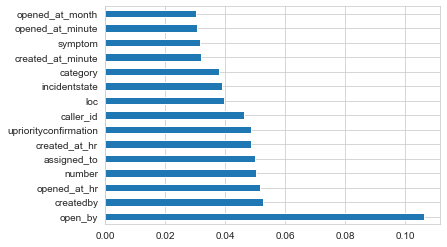

In [ ]:
features=pd.Series(modelextra.feature_importances_,index=X_train.columns)
features.nlargest(15).plot(kind='barh')
plt.show()

# Feature Selection using Mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# determine the mutual information
mutual = mutual_info_classif(X_train_smote, y_train_smote)
mutual

array([0.67499111, 0.25320848, 0.0885842 , 0.17398583, 0.00478853,
       0.48182249, 0.0264009 , 0.02887586, 0.10823094, 0.60857401,
       0.49714736, 0.30175993, 0.38447251, 0.19562642, 0.27369541,
       0.21719825, 0.38009686, 0.20238909, 0.15147218, 0.01628598,
       0.36897491, 0.45386089, 0.09374252, 0.05318745, 0.01595792,
       0.19747062, 0.19020702, 0.09195915, 0.05246572, 0.01695262,
       0.18532352, 0.17656169])

In [ ]:
mutual = pd.Series(mutual)
mutual.index = X_train.columns
mutual.sort_values(ascending=False)


number                   0.674991
caller_id                0.608574
open_by                  0.497147
sysmodcount              0.481822
updated_minute           0.453861
updatedby                0.384473
assigned_to              0.380097
updated_hr               0.368975
createdby                0.301760
category                 0.273695
incidentstate            0.253208
symptom                  0.217198
updated_day              0.202389
opened_at_hr             0.197471
loc                      0.195626
opened_at_minute         0.190207
created_at_hr            0.185324
created_at_minute        0.176562
reassignmentcount        0.173986
updated_month            0.151472
upriorityconfirmation    0.108231
opened_at_day            0.093743
created_at_day           0.091959
active                   0.088584
opened_at_month          0.053187
created_at_month         0.052466
knowledge                0.028876
contact_type             0.026401
created_at_year          0.016953
updated_year  

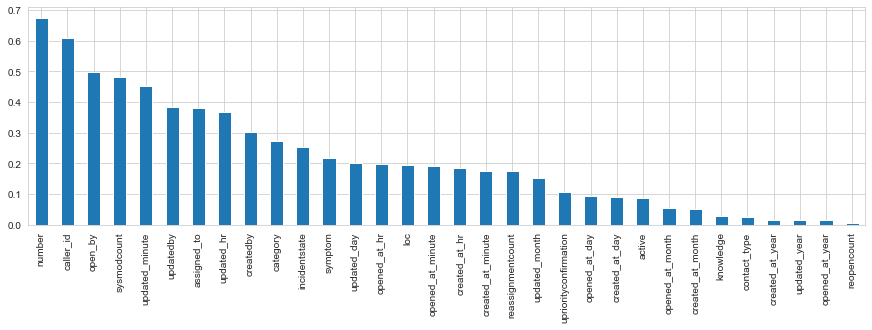

In [ ]:

mutual.sort_values(ascending=False).plot.bar(figsize=(15, 4))


# Feature Importance using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modeldtc= DecisionTreeClassifier()
modeldtc.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [ ]:
feature = pd.Series(modeldtc.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)


open_by                  0.241686
sysmodcount              0.098325
number                   0.079604
incidentstate            0.061168
upriorityconfirmation    0.056096
caller_id                0.050888
opened_at_hr             0.048905
created_at_hr            0.044755
createdby                0.043303
reassignmentcount        0.038545
category                 0.029279
assigned_to              0.024837
loc                      0.022224
opened_at_minute         0.021811
active                   0.017640
created_at_minute        0.016486
symptom                  0.016462
opened_at_month          0.014355
updatedby                0.012453
created_at_month         0.011602
updated_month            0.008860
created_at_day           0.008567
updated_hr               0.008197
opened_at_day            0.006553
updated_day              0.005934
updated_minute           0.005380
reopencount              0.004976
knowledge                0.000789
contact_type             0.000223
opened_at_year

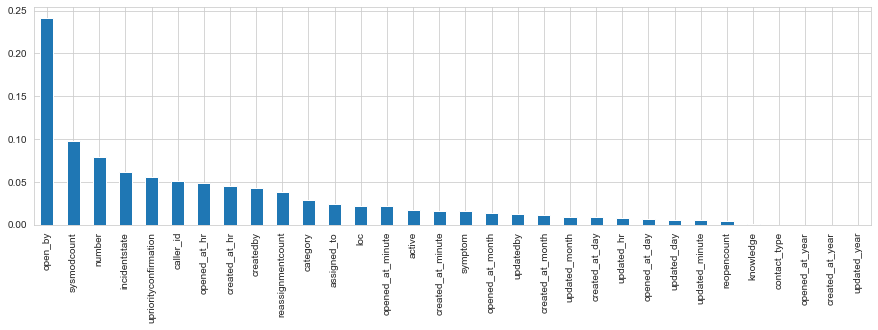

In [ ]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))


In [ ]:
 from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df.shape

(141708, 33)

In [ ]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=16)
ordered_feature=ordered_rank_feature.fit(X_train_smote,y_train_smote)
ordered_feature

SelectKBest(k=16, score_func=<function chi2 at 0x000001F637328670>)

In [ ]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(10,'scores')


,scores,0
0,6.113913e+07,number
9,1.672049e+06,caller_id
10,8.969789e+05,open_by
12,3.415694e+05,updatedby
11,2.664181e+05,createdby
16,7.094044e+04,assigned_to
13,5.768222e+04,loc
14,2.612258e+04,category
22,2.396308e+04,opened_at_day
5,2.311061e+04,sysmodcount


# these are top 10 features 

# From the above Feature Selection below are the important Features for predicting the impact 
number,
caller_id,
open_by,
updatedby,
createdby,
assigned_to,
loc,
category,
opened_at_day,
sysmodcount,

In [ ]:
X_train_smote_new= X_train_smote[['number', 'caller_id', 'open_by', 'updatedby', 'createdby', 'assigned_to', 'loc', 'category', 'opened_at_day', 'sysmodcount']]
X_test_new= X_test[['number', 'caller_id', 'open_by', 'updatedby', 'createdby', 'assigned_to', 'loc', 'category', 'opened_at_day', 'sysmodcount']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train_smote_new,y_train_smote)


RandomForestClassifier(max_depth=27)

In [ ]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test_new)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))


0.9804059934608238
              precision    recall  f1-score   support

           1       0.88      0.64      0.74      1098
           2       0.99      0.99      0.99     40176
           3       0.87      0.84      0.86      1239

    accuracy                           0.98     42513
   macro avg       0.91      0.82      0.86     42513
weighted avg       0.98      0.98      0.98     42513



In [ ]:
confusion_matrix(y_test,y_predict_rf)


array([[  699,   397,     2],
       [   91, 39936,   149],
       [    8,   186,  1045]], dtype=int64)